##  fakefriends.csv

user_id : 사용자
ID name : 사용자이름
age : 나이
num_friends : 친구수

1. 평균 친구수 구하기
2. 가장 친구가 많은 사용자 찾기
3. 친구수가 100이상인 사람 필터링
4. 특정 나에 속한 친구들의 수 합계
5. 분석 주제 추가...

In [2]:
spark.stop()

In [3]:
import os
from pyspark import SparkConf, SparkContext

# SparkSession 생성
conf = SparkConf().setMaster("local").setAppName("mnms")
spark = SparkContext(conf = conf).getOrCreate()

# 파일 경로 설정
directory = os.path.join(os.getcwd(), "data")
filename = "fakefriends.csv"
filepath = os.path.join(directory, filename)

# 데이터 로드
lines = spark.textFile("file:///" + filepath.replace("\\", "/"))
lines

24/12/05 16:01:50 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


file:////home/lab02/src/data/fakefriends.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [4]:
lines.take(5)

['0,Will,33,385',
 '1,Jean-Luc,26,2',
 '2,Hugh,55,221',
 '3,Deanna,40,465',
 '4,Quark,68,21']

In [5]:
# 1번 평균 친구수 구하기
parsed_lines = lines.map(lambda line: line.split(","))

friends_avg = parsed_lines.map(lambda fields: int(fields[3])).sum() / parsed_lines.map(lambda fields: int(fields[3])).count()
print(f"평균 친구 수: {int(friends_avg)} 명")

평균 친구 수: 248 명


In [10]:
# 2번. 가장 친구가 많은 사용자 찾기
# 3번. 친구수가 100명 이상인 사람 필터링

# 친구 수를 기준으로 내림차순 정렬
sorted_friends = sorted(parsed_lines.map(lambda fields: (fields[1], int(fields[3]))).collect(), key=lambda x: x[1], reverse=True)

# 결과 출력
n = int(input('친구수 몇명 이상만? : '))
for name, num_friends in sorted_friends:
    if num_friends >= n : print(f"이름: {name}, 친구 수: {num_friends}명")

친구수 몇명 이상만? :  200


이름: Beverly, 친구 수: 499명
이름: Data, 친구 수: 499명
이름: Julian, 친구 수: 499명
이름: Jadzia, 친구 수: 497명
이름: Jean-Luc, 친구 수: 496명
이름: Dukat, 친구 수: 496명
이름: Data, 친구 수: 493명
이름: Geordi, 친구 수: 493명
이름: Worf, 친구 수: 492명
이름: Nerys, 친구 수: 492명
이름: Keiko, 친구 수: 492명
이름: Keiko, 친구 수: 491명
이름: Will, 친구 수: 491명
이름: Jean-Luc, 친구 수: 490명
이름: Ben, 친구 수: 488명
이름: Rom, 친구 수: 487명
이름: Data, 친구 수: 487명
이름: Beverly, 친구 수: 485명
이름: Ezri, 친구 수: 481명
이름: Worf, 친구 수: 481명
이름: Leeta, 친구 수: 478명
이름: Geordi, 친구 수: 477명
이름: Martok, 친구 수: 476명
이름: Leeta, 친구 수: 476명
이름: Worf, 친구 수: 474명
이름: Kasidy, 친구 수: 472명
이름: Keiko, 친구 수: 472명
이름: Kasidy, 친구 수: 471명
이름: Dukat, 친구 수: 471명
이름: Gowron, 친구 수: 471명
이름: Ezri, 친구 수: 471명
이름: Leeta, 친구 수: 470명
이름: Quark, 친구 수: 470명
이름: Keiko, 친구 수: 470명
이름: Lwaxana, 친구 수: 469명
이름: Nerys, 친구 수: 469명
이름: Jean-Luc, 친구 수: 467명
이름: Deanna, 친구 수: 465명
이름: Hugh, 친구 수: 465명
이름: Nog, 친구 수: 464명
이름: Elim, 친구 수: 463명
이름: Odo, 친구 수: 462명
이름: Dukat, 친구 수: 462명
이름: Jean-Luc, 친구 수: 460명
이름: Weyoun, 친구 수: 460명
이

In [14]:
# 4번. 특정 나이에 속한 친구들의 수 합계

age_friend_pairs = parsed_lines.map(lambda fields: (int(fields[2]), int(fields[3])))
age_totals = age_friend_pairs.mapValues(lambda num_friends: (num_friends, 1)).reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
#age_totals.take(5)
age_averages = age_totals.mapValues(lambda totals: round(totals[0] / totals[1],2)) #나이대별 평균 나이를 구함
#age_averages.take(5)

# 각 나이들에 대한 평균값 출력, 이때 친구수별로 정렬
for age, avg_friends in sorted(list(age_averages.collect()), key=lambda x: x[1], reverse=True) : 
    print(f"나이: {age}, 평균 친구 수: {avg_friends:.2f}명")

나이: 63, 평균 친구 수: 384.00명
나이: 21, 평균 친구 수: 350.88명
나이: 18, 평균 친구 수: 343.38명
나이: 52, 평균 친구 수: 340.64명
나이: 33, 평균 친구 수: 325.33명
나이: 45, 평균 친구 수: 309.54명
나이: 56, 평균 친구 수: 306.67명
나이: 42, 평균 친구 수: 303.50명
나이: 51, 평균 친구 수: 302.14명
나이: 65, 평균 친구 수: 298.20명
나이: 55, 평균 친구 수: 295.54명
나이: 44, 평균 친구 수: 282.17명
나이: 48, 평균 친구 수: 281.40명
나이: 64, 평균 친구 수: 281.33명
나이: 54, 평균 친구 수: 278.08명
나이: 66, 평균 친구 수: 276.44명
나이: 68, 평균 친구 수: 269.60명
나이: 41, 평균 친구 수: 268.56명
나이: 31, 평균 친구 수: 267.25명
나이: 57, 평균 친구 수: 258.83명
나이: 61, 평균 친구 수: 256.22명
나이: 50, 평균 친구 수: 254.60명
나이: 40, 평균 친구 수: 250.82명
나이: 37, 평균 친구 수: 249.33명
나이: 36, 평균 친구 수: 246.60명
나이: 23, 평균 친구 수: 246.30명
나이: 34, 평균 친구 수: 245.50명
나이: 26, 평균 친구 수: 242.06명
나이: 30, 평균 친구 수: 235.82명
나이: 69, 평균 친구 수: 235.20명
나이: 24, 평균 친구 수: 233.80명
나이: 47, 평균 친구 수: 233.22명
나이: 43, 평균 친구 수: 230.57명
나이: 27, 평균 친구 수: 228.12명
나이: 46, 평균 친구 수: 223.69명
나이: 53, 평균 친구 수: 222.86명
나이: 62, 평균 친구 수: 220.77명
나이: 59, 평균 친구 수: 220.00명
나이: 29, 평균 친구 수: 215.92명
나이: 67, 평균 친구 수: 214.62명


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


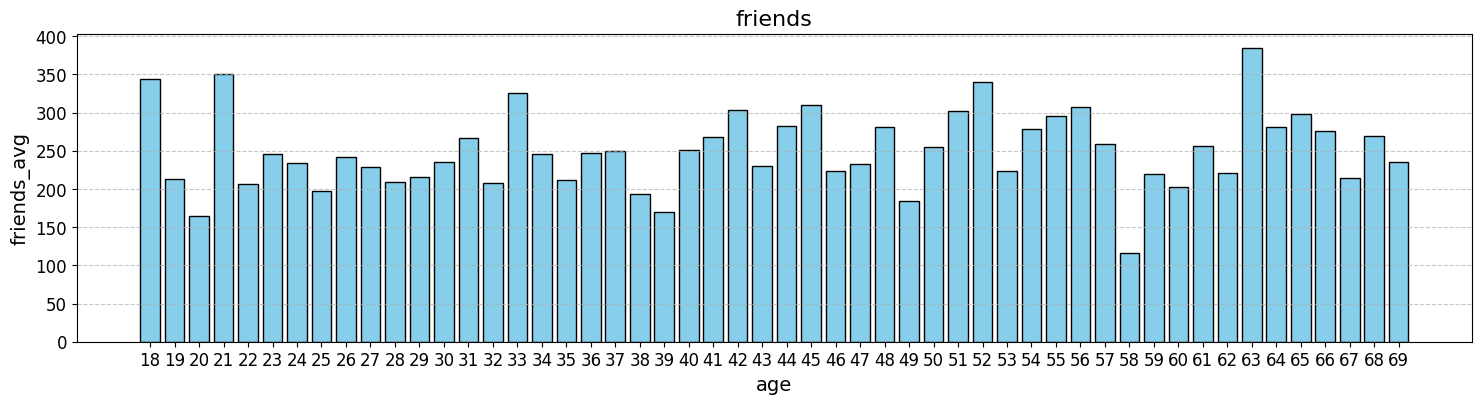

In [19]:
# 4-1번. 나이대별 친구수 그래프로 표현하기
sorted_age_averages = sorted(age_averages.collect(), key=lambda x: x[0])
# sorted_age_averages

# 그래프로 표현
# 데이터 분리
ages = [item[0] for item in sorted_age_averages]
avg_friends = [item[1] for item in sorted_age_averages]

# 그래프 생성
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))
plt.bar(ages, avg_friends, color='skyblue', edgecolor='black')
plt.title('friends', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('friends_avg', fontsize=14)
plt.xticks(ages, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

In [43]:
# 5번. 친구수 상위 10%인 사람들, 하위 10%인 사람들 나이대 조사
sorted_friends = sorted(parsed_lines.map(lambda fields: (fields[1], int(fields[2]), int(fields[3]))).collect(), key=lambda x: x[2], reverse=True)
#sorted_friends

# 상위 10%와 하위 10% 데이터 추출
top_10_percent = sorted_friends[:int(0.1 * len(sorted_friends))]
bottom_10_percent = sorted_friends[int(0.9 * len(sorted_friends)):]
# bottom_10_percent

In [49]:
# 상위 10% 나이대별 수 계산
top_10_counts = {}
for _, age, _ in top_10_percent : top_10_counts[age] = top_10_counts.get(age, 0) + 1

# 하위 10% 나이대별 수 계산
bottom_10_counts = {}
for _, age, _ in bottom_10_percent : bottom_10_counts[age] = bottom_10_counts.get(age, 0) + 1
top_10_counts

{18: 2,
 44: 1,
 64: 1,
 45: 3,
 66: 1,
 62: 1,
 51: 2,
 36: 1,
 24: 1,
 26: 1,
 69: 2,
 21: 4,
 68: 2,
 47: 1,
 52: 2,
 30: 2,
 25: 1,
 31: 1,
 22: 1,
 49: 1,
 55: 3,
 33: 3,
 27: 1,
 37: 1,
 63: 1,
 61: 2,
 42: 1,
 40: 2,
 57: 1,
 46: 1,
 54: 1,
 38: 2}

In [51]:
# 결과 출력
print("상위 10% 나이대별 수")
for age, count in sorted(top_10_counts.items()) : print(f"나이: {age}, 인원 수: {count}명")

print("\n하위 10% 나이대별 수")
for age, count in sorted(bottom_10_counts.items()) : print(f"나이: {age}, 인원 수: {count}명")

상위 10% 나이대별 수
나이: 18, 인원 수: 2명
나이: 21, 인원 수: 4명
나이: 22, 인원 수: 1명
나이: 24, 인원 수: 1명
나이: 25, 인원 수: 1명
나이: 26, 인원 수: 1명
나이: 27, 인원 수: 1명
나이: 30, 인원 수: 2명
나이: 31, 인원 수: 1명
나이: 33, 인원 수: 3명
나이: 36, 인원 수: 1명
나이: 37, 인원 수: 1명
나이: 38, 인원 수: 2명
나이: 40, 인원 수: 2명
나이: 42, 인원 수: 1명
나이: 44, 인원 수: 1명
나이: 45, 인원 수: 3명
나이: 46, 인원 수: 1명
나이: 47, 인원 수: 1명
나이: 49, 인원 수: 1명
나이: 51, 인원 수: 2명
나이: 52, 인원 수: 2명
나이: 54, 인원 수: 1명
나이: 55, 인원 수: 3명
나이: 57, 인원 수: 1명
나이: 61, 인원 수: 2명
나이: 62, 인원 수: 1명
나이: 63, 인원 수: 1명
나이: 64, 인원 수: 1명
나이: 66, 인원 수: 1명
나이: 68, 인원 수: 2명
나이: 69, 인원 수: 2명

하위 10% 나이대별 수
나이: 18, 인원 수: 1명
나이: 19, 인원 수: 2명
나이: 20, 인원 수: 1명
나이: 22, 인원 수: 1명
나이: 25, 인원 수: 3명
나이: 26, 인원 수: 2명
나이: 28, 인원 수: 2명
나이: 29, 인원 수: 1명
나이: 30, 인원 수: 1명
나이: 31, 인원 수: 1명
나이: 32, 인원 수: 2명
나이: 35, 인원 수: 2명
나이: 38, 인원 수: 3명
나이: 40, 인원 수: 3명
나이: 47, 인원 수: 2명
나이: 49, 인원 수: 2명
나이: 54, 인원 수: 1명
나이: 56, 인원 수: 1명
나이: 57, 인원 수: 1명
나이: 58, 인원 수: 4명
나이: 59, 인원 수: 1명
나이: 60, 인원 수: 1명
나이: 61, 인원 수: 1명
나이: 62, 인원 수: 5명
나이: 66, 인원 수: 1명
나이

In [52]:
spark.stop()